<a href="https://colab.research.google.com/github/endlessstory35/google-play-store/blob/main/Copy_of_Copy_of_main_google_play_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

# **EXPLORATORY DATA ANALYSIS INVOLVED**

>







# **IMPORT OF LIBRARIES AND KNOW  YOUR DATA**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
                            


In [ ]:
# load google app review data into dataframe
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Play Store Data.csv')

In [ ]:
# df.head() will provide us with first five recods of the given data i.e,index(0-4)
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# df.tail() provide us five records data from end 
df.tail()

In [ ]:
# Quick information about the google app review data about non null count and data type in column name
df.info()

In [ ]:
# it gives data about count, mean  
df.describe()

In [ ]:
# look for the random 10 records
df.sample(10)


In [ ]:
# for finding what are the types of Category
df['Category'].unique()

In [ ]:
# this gives us about the type of apps available on google apps 
df['Type'].unique()

array(['Free', 'Paid', nan, '0'], dtype=object)

In [ ]:
# for finding the  type of content rating
df['Content Rating'].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated', nan], dtype=object)

In [ ]:
df['Rating'].unique()

In [ ]:
df['Rating'].mode()


0    4.4
dtype: float64

In [ ]:
df['Rating'].median()

4.3

#**DATA CLEANING** 

In [ ]:

# data cleaning of size columm

val = df[df['Size'] == '1,000+'].index
df.drop(axis=0, inplace=True, index=val)


sizes = [i for i in df['Size']]

cleaned_data=[]
def fix_size(sizes_list):
 for size in sizes_list:

    if 'M' in size:

      size=size.replace('M','')
      size = float(size)

    elif 'k' in size:
      size=size.replace('k','')
      size = float(size)
      size = size/1024



    elif  'Varies with device' in size:
      size=float(0) 

    cleaned_data.append(size)  
 return cleaned_data
df['Size'] = fix_size(sizes)
df['Size'] = df['Size'].astype(float)
       



In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
# Review data cleaning
rev= [i for i in df['Reviews']]

def fix_reviews(reviews_list):
    """
    As 'M' has been found the in reviews data, this function
    replace it with million
    """
    cleaned_data = []
    for rev in reviews_list:
        if 'M' in rev:
            rev = rev.replace('M', '')
            rev = float(rev) * 1000000  # 1M = 1,000,000
        cleaned_data.append(rev)
    return cleaned_data

df['Reviews'] = fix_reviews(rev)
df['Reviews'] = df['Reviews'].astype(float)


In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
df['Price'].unique()


array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [ ]:
# cleaning of price
price = [i for i in df['Price']]

def clean_prices(prices_list):
    cleaned_data = []
    for price in prices_list:
        if '$' in price:
            price = price.replace('$', '')
        cleaned_data.append(price)
    return cleaned_data

df['Price'] = clean_prices(price)
df['Price'] = df['Price'].astype(float)


In [ ]:
df.sample(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9583,Shoot`Em Down: Shooting game,GAME,3.9,7972.0,88.0,"500,000+",Free,0.00,Teen,Action,"August 12, 2017",56,4.1 and up
8385,Coupon Mob - Discount Coupons,SHOPPING,3.0,2.0,1.3,100+,Free,0.00,Everyone,Shopping,"May 30, 2018",6.0,3.0 and up
8540,TorrDroid - Torrent Downloader,TOOLS,4.7,59632.0,10.0,"1,000,000+",Free,0.00,Everyone,Tools,"April 3, 2018",1.5.2,4.1 and up
9093,dz NEWS Algerie,NEWS_AND_MAGAZINES,4.2,2318.0,4.5,"100,000+",Free,0.00,Everyone,News & Magazines,"December 13, 2014",2.3,2.3 and up
4110,F-Stop Gallery,PHOTOGRAPHY,4.2,12726.0,15.0,"1,000,000+",Free,0.00,Everyone,Photography,"July 21, 2018",4.9.18,4.1 and up
7083,CA Mobile Authenticator,BUSINESS,NaN,9.0,6.9,"1,000+",Free,0.00,Everyone,Business,"December 15, 2016",1.0.0,4.2 and up
8036,Oracle CX Cloud Mobile,BUSINESS,4.4,48.0,54.0,"5,000+",Free,0.00,Everyone,Business,"July 7, 2018",11.13.18.05.07.03,4.4 and up
9377,Doomsday Preppers™,FAMILY,4.2,137167.0,52.0,"1,000,000+",Free,0.00,Everyone,Strategy,"January 17, 2017",130.48.08,4.0.3 and up
9101,amm dz,FINANCE,NaN,0.0,14.0,1+,Paid,5.99,Everyone,Finance,"July 8, 2018",1.0,4.2 and up
2317,Anthem Anywhere,MEDICAL,2.7,2657.0,24.0,"500,000+",Free,0.00,Everyone,Medical,"July 27, 2018",8.0.226,4.4 and up


In [ ]:
#cleaning of Install data 

installs = [i for i in df['Installs']]

def clean_installs(installs_list):
    cleaned_data = []
    for install in installs_list:
        if ',' in install:
            install = install.replace(',', '')
        if '+' in install:
            install = install.replace('+', '')
        install = int(install)
        cleaned_data.append(install)
    return cleaned_data
        
df['Installs'] = clean_installs(installs)
df['Installs'] = df['Installs'].astype(float)

In [ ]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19.0,10000.0,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [ ]:
total1=  df.groupby("Category")['Type'].agg("count").reset_index()
total1

,Category,Type
0,ART_AND_DESIGN,65
1,AUTO_AND_VEHICLES,85
2,BEAUTY,53
3,BOOKS_AND_REFERENCE,231
4,BUSINESS,460
5,COMICS,60
6,COMMUNICATION,387
7,DATING,234
8,EDUCATION,156
9,ENTERTAINMENT,149


In [ ]:
# Remove the record where "Type" is null:
index= df[df['Type'].isna()].index

df.drop(axis = 0, inplace = True,index=index)


In [ ]:
# REMOVE THE RECORD WHERE "TYPE" IS "O" BY USING DROP FUNCTION
for x in df.index:
  if df.loc[x, "Type"] == "0":
    df.drop(x, inplace = True)

  

In [ ]:
df['Type'].unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# check for null values , isna() detects missing values and return boolean values
df.isna().sum()

App                  0
Category             0
Rating            1473
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [ ]:
df["Rating"].fillna(4.1,inplace = True)


In [ ]:
#df.drop(axis =0,index =10472 ,inplace=True)

In [ ]:
df[df['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [ ]:
df.dropna(subset = ['Content Rating'], inplace = True)

In [ ]:
print(df['Content Rating'].agg('count'))

10839


In [ ]:
print(df['Content Rating'].unique())

['Everyone' 'Teen' 'Everyone 10+' 'Mature 17+' 'Adults only 18+' 'Unrated']


# **DATA VISUALIZATION**

# 1. NUMBER OF APPS INSTALLS IN EACH CATEGORY

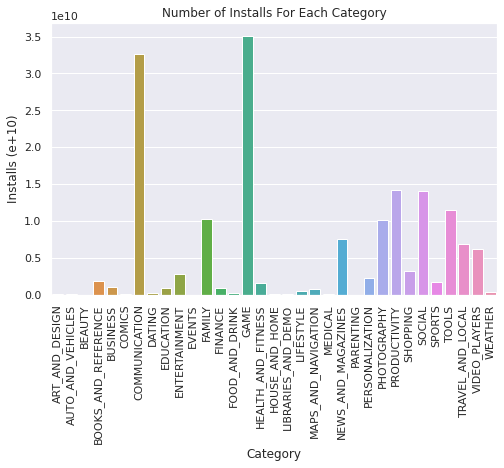

In [ ]:
#2.  get the number of installs for each category
categories = df.groupby('Category')
category_installs_sum_df = categories[['Installs']].sum()
category_installs_sum_df = category_installs_sum_df.reset_index () # to convert groupby object into dataframe

plt.figure(figsize=(8, 5))
sns.barplot(x='Category', y='Installs', data=category_installs_sum_df)
plt.xticks(rotation=90)
plt.ylabel('Installs (e+10)')
plt.title('Number of Installs For Each Category')
plt.show()

# 2. DISTRIBUTION OF PAID APPS 

In [ ]:
all_paid = df[df['Type'] == 'Paid']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (paid apps)')]

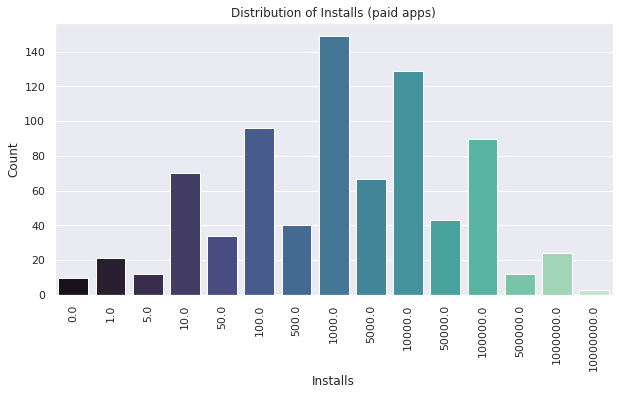

In [ ]:
paid_counts = pd.DataFrame(all_paid['Installs'].value_counts())
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
sns.barplot(x=paid_counts.index, y=paid_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (paid apps)')

# 3. DISTRIBUTION OF FREE APPS

In [ ]:
df = df[df['Installs'] != 'Free']

In [ ]:
all_free = df[df['Type'] == 'Free']

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Installs'),
 Text(0.5, 1.0, 'Distribution of Installs (free apps)')]

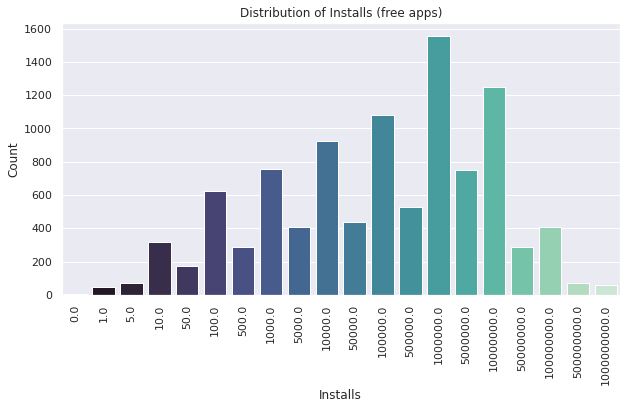

In [ ]:
free_counts = pd.DataFrame(all_free['Installs'].value_counts())
plt.figure(figsize=(10, 5))
plt.xticks(rotation = 90)
sns.barplot(x=free_counts.index, y=free_counts['Installs'], palette='mako').set(xlabel='Installs', ylabel='Count', title='Distribution of Installs (free apps)')

# 4. TOP 10 INSTALLED APP IN SPORTS CATEGORY

In [ ]:
def findtop10incategory(str):
    str = str.upper()
    top10 = df[df['Category'] == str]
    top10apps = top10.sort_values(by='Installs', ascending=False).head(10)
    # Top_Apps_in_art_and_design
    plt.figure(figsize=(8,8))
    plt.title('Top 10 Installed Apps',size = 20);    
    graph = sns.barplot(x = top10apps.App, y = top10apps.Installs)
    graph.set_xticklabels(graph.get_xticklabels(), rotation= 90, horizontalalignment='right');

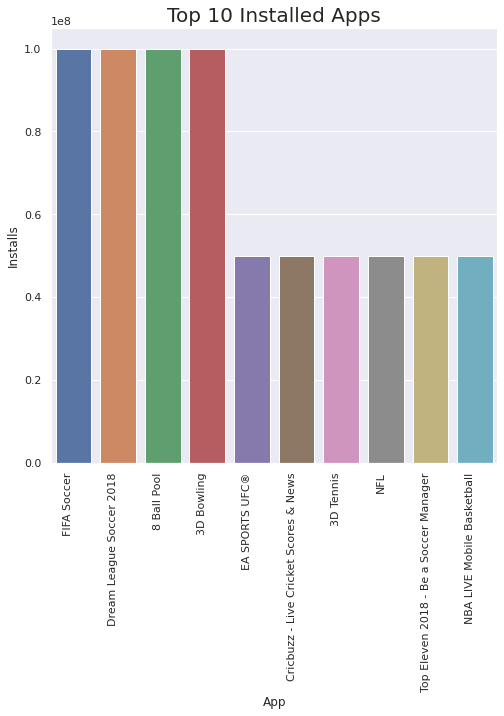

In [ ]:
# bargraph for  top 10 installed apps in sports category
findtop10incategory('Sports')

# 5. TOP 10 PAID APPS

In [ ]:
# top ten paid apps 
top_10_paid_apps = df[df['Type'] == 'Paid'].sort_values(by='Price', ascending=False).head(11)
top_10_paid_apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275.0,7.300000,10000.0,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472.0,0.942383,5000.0,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up
5373,I AM RICH PRO PLUS,FINANCE,4.0,36.0,41.000000,1000.0,Paid,399.99,Everyone,Finance,"June 25, 2018",1.0.2,4.1 and up
9934,I'm Rich/Eu sou Rico/أنا غني/我很有錢,LIFESTYLE,4.1,0.0,40.000000,0.0,Paid,399.99,Everyone,Lifestyle,"December 1, 2017",MONEY,4.1 and up
5354,I am Rich Plus,FAMILY,4.0,856.0,8.700000,10000.0,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5351,I am rich,LIFESTYLE,3.8,3547.0,1.800000,100000.0,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5358,I am Rich!,FINANCE,3.8,93.0,22.000000,1000.0,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5362,I Am Rich Pro,FAMILY,4.4,201.0,2.700000,5000.0,Paid,399.99,Everyone,Entertainment,"May 30, 2017",1.54,1.6 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718.0,26.000000,10000.0,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
5364,I am rich (Most expensive app),FINANCE,4.1,129.0,2.700000,1000.0,Paid,399.99,Teen,Finance,"December 6, 2017",2,4.0.3 and up


In [ ]:
top_10_paid_apps = top_10_paid_apps[['App', 'Installs']].drop(9934)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


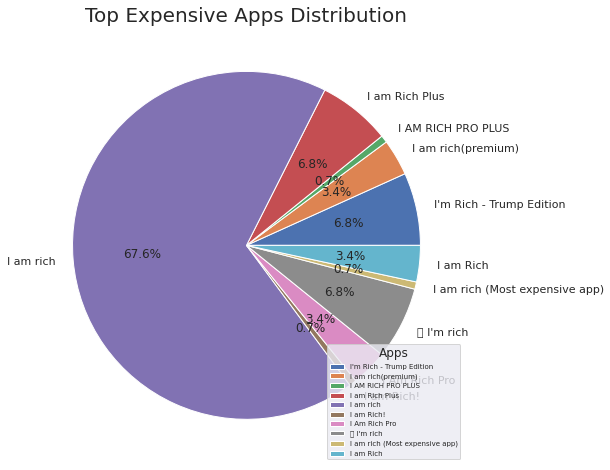

In [ ]:
plt.figure(figsize=(9,8));
plt.pie(top_10_paid_apps.Installs, explode=None, labels=top_10_paid_apps.App, autopct='%1.1f%%', startangle=0);
plt.title('Top Expensive Apps Distribution',size = 20);
plt.legend(top_10_paid_apps.App, 
           loc="lower right",
           title="Apps",
           fontsize = "xx-small"
          );

# 6.AVERAGE PRICE OF PAID APPS IN EACH CATEGORY

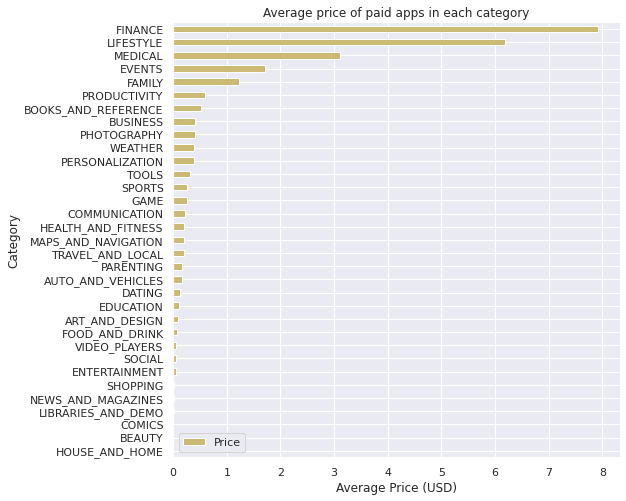

In [ ]:

df.groupby('Category')['Price'].mean().sort_values(ascending=False).plot.barh(figsize = (8,8), color='y').invert_yaxis()
plt.xlabel('Average Price (USD)')
plt.title('Average price of paid apps in each category')
plt.legend()